<font size="10">Red Wine quality</font>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler

In [3]:
data = pd.read_csv('Data/wine_quality_red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
for i in  data :
    y = i.replace(' ','_')
    data = data.rename(columns={i:y})
data.head(0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Nan quantity

(data.isna().sum()/data.__len__())*100

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

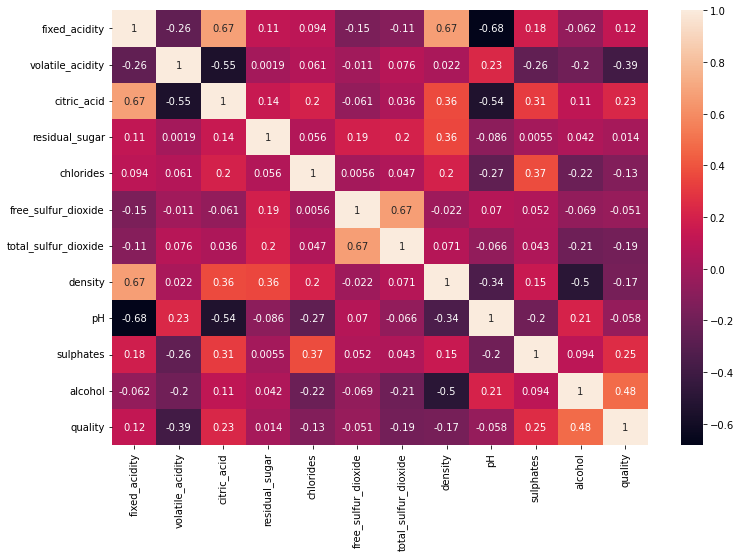

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(figsize=(20,12),nrows=3, ncols=3, sharey=True)
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i, column in enumerate(data[list(set(data.columns.values)-{'Life Expectancy'})].columns.values.tolist()):
    sns.scatterplot(data[column], df['Life Expectancy'], ax=axes[i])
    axes[i].set_xlabel(column, fontdict=fontlabel)
    axes[i].set_ylabel('Life Expectancy', fontdict=fontlabel)
fig.suptitle("L'espérance de vie en fonction des features potentielles du modèle", size=20, weight='bold', y=0.91);

/root/.pyenv/versions/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='quality'>

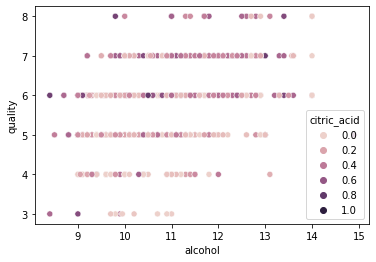

In [26]:
sns.scatterplot(data["alcohol"],data["quality"],hue=data["citric_acid"])

# Linear Regression

In [10]:
y = data['quality']
X = data.drop(columns=['quality'])

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
lr = LinearRegression()

In [13]:
lr_first = lr.fit(X_train,y_train)

In [14]:
lr_first.score(X_test,y_test)

0.30700228623263304

In [15]:
cross_validation = KFold(5, random_state=100, shuffle=True)
cross_val_score(lr_first,X_train,y_train,cv=cross_validation)

array([0.35568511, 0.39800873, 0.29047575, 0.38533655, 0.35207973])

In [16]:
cross_val_score(lr_first,X_train,y_train,cv=cross_validation).mean()

0.3563171715437738

# MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train_scale = scaler.fit_transform(X_train)

In [19]:
X_test_scale = scaler.transform(X_test)

In [20]:
lr_scale = lr.fit(X_train_scale,y_train)

In [21]:
lr_minmax.score(X_test_scale,y_test)

NameError: name 'lr_minmax' is not defined

In [ ]:
cross_validation = KFold(10, random_state=100, shuffle=True)
cross_val_score(lr_minmax,X_train_scale,y_train,cv=cross_validation)

array([0.46208361, 0.228272  , 0.44845917, 0.42868334, 0.37625296,
       0.18084751, 0.35766179, 0.19232924, 0.25883925, 0.32438663])

# StandardScaler

In [ ]:
standardscaler = StandardScaler()

In [ ]:
X_train_ss = standardscaler.fit_transform(X_train)

In [ ]:
X_test_ss = standardscaler.transform(X_test)

In [ ]:
lr_ss = lr.fit(X_train_ss,y_train)

In [ ]:
lr_ss.score(X_test_ss,y_test)

0.34255543863451243

# RobustScaler

In [ ]:
rs = RobustScaler()

In [ ]:
X_train_rs = rs.fit_transform(X_train)

In [ ]:
X_test_rs = rs.transform(X_test)

In [ ]:
lr_rs = lr.fit(X_train_rs,y_train)

In [ ]:
lr_rs.score(X_test_rs,y_test)

0.34255543863451243

# Recherche des meilleurs features

## Une seule feature

In [ ]:
X_train_alcohol = X_train['alcohol']
X_train_alcohol = np.array(X_train_alcohol).reshape(-1,1)

X_test_alcohol = X_test['alcohol']
X_test_alcohol = np.array(X_test_alcohol).reshape(-1,1)

lr_alcohol = lr.fit(X_train_alcohol, y_train)

lr_alcohol.score(X_test_alcohol, y_test)

0.19502362863099798

In [ ]:
cross_validation = KFold(5, random_state=0, shuffle=True)
cross_val_score(lr_alcohol,X_train_alcohol,y_train,cv=cross_validation)

array([0.25342863, 0.12478203, 0.30656024, 0.11972194, 0.31740257])

## Deux features

In [ ]:
X_train_alcohol_sulphates = X_train[['alcohol','sulphates']].copy()
X_test_alcohol_sulphates = X_test[['alcohol','sulphates']].copy()

lr_alcohol_sulphates = lr.fit(X_train_alcohol_sulphates, y_train)

lr_alcohol_sulphates.score(X_test_alcohol_sulphates, y_test)

0.24192860866402355

In [ ]:
cross_validation = KFold(5, random_state=1, shuffle=True)
cross_val_score(lr_alcohol_sulphates,X_train_alcohol_sulphates,y_train,cv=cross_validation)

array([0.25620986, 0.23411001, 0.3048054 , 0.22913992, 0.34613882])

## Trois features

In [ ]:
X_train_alcohol_sulphates_citric_acid = np.array(X_train[['alcohol','sulphates','citric_acid']].copy())
X_test_alcohol_sulphates_citric_acid = np.array(X_test[['alcohol','sulphates','citric_acid']].copy())

lr_alcohol_sulphates_citric_acid = lr.fit(X_train_alcohol_sulphates_citric_acid, y_train)

lr_alcohol_sulphates_citric_acid.score(X_test_alcohol_sulphates_citric_acid, y_test)

0.2626420532822711

In [ ]:
cross_validation = KFold(5, random_state=2, shuffle=True)
cross_val_score(lr_alcohol_sulphates_citric_acid,X_train_alcohol_sulphates_citric_acid,y_train,cv=cross_validation)

array([0.26494068, 0.23924272, 0.28153785, 0.29699985, 0.32398209])

## Somme des trois features

In [ ]:
X_train_alcohol_sulphates_citric_acid_sum = X_train['alcohol'] + X_train['sulphates'] + X_train['citric_acid']
X_train_alcohol_sulphates_citric_acid_sum = np.array(X_train_alcohol_sulphates_citric_acid_sum).reshape(-1,1)
X_test_alcohol_sulphates_citric_acid_sum = X_test['alcohol'] + X_test['sulphates'] + X_test['citric_acid']
X_test_alcohol_sulphates_citric_acid_sum = np.array(X_test_alcohol_sulphates_citric_acid_sum).reshape(-1,1)

lr_alcohol_sulphates_citric_acid_sum = lr.fit(X_train_alcohol_sulphates_citric_acid_sum, y_train)

lr_alcohol_sulphates_citric_acid_sum.score(X_test_alcohol_sulphates_citric_acid_sum, y_test)

0.24750632288409502

In [ ]:
cross_validation = KFold(5, random_state=3, shuffle=True)
cross_val_score(lr_alcohol_sulphates_citric_acid_sum,X_train_alcohol_sulphates_citric_acid_sum,y_train,cv=cross_validation)

array([0.29313301, 0.26075089, 0.21444874, 0.35361112, 0.27239507])

# Exporter le modele

In [ ]:
predict_test = lr_alcohol_sulphates_citric_acid.predict(X_test_alcohol_sulphates_citric_acid[[0]])
print(f" Composition du vin :{X_test_alcohol_sulphates_citric_acid[[0]]}")
print(f" Note de la qualite du vin :{predict_test}")

 Composition du vin :[[11.7   0.74  0.07]]
 Note de la qualite du vin :[6.04203596]


In [ ]:
pickle.dump(lr_alcohol_sulphates_citric_acid, open('lr_red_wine.pkl', 'wb'))